# Pymaceuticals Inc.
---

### Analysis

•	Looking at summary statistics, Capomulin, Ramicane have the lowest final mean and median tumor volumes. They also show low variance between mice, meaning the mice are more consistently closer to the mean tumor volume. 

•	The bar chart demonstrates that Capomulin and Ramicane have the highest number of timepoints. There are a few ways this data can be interpreted: more mice in general are being tested (resulting in more timepoints for each drug), and/or that the tested mice are surviving farther into treatment. 

•	The study is relatively evenly divided between male and female mice, so mice gender does not strongly bias the study

•	The box and whisker plot shows that Capomulin and Ramicane have the lowest final tumor volume. Their interquartiles/boxes overlap each other, showing that despite some small differences (Capomulin shows a slight skew in distribution and smaller dispersion vs. Ramicane's more centered distribution and slightly higher dispersion), these two drugs appear to perform similarly in final tumor volume. Infubinol and Ceftamin have larger tumor volumes, and their interquartiles/boxes do not overlap with Capomulin and Ramicane showing that they do not perform as well. Infubinol does have one outlier, one mouse that showed much smaller final tumor volume than the other mice on the same drug.

•	The line chart of mouse L509 shows that on the Capomulin regime, the data shows a growth in tumor size with steep drops at the 20 and 30 day timepoints. Presumably this is when the drug is being administered/taking effect but this was not described in the data. The drug does not seem to stop tumor from growing, but it seems to significantly shrink the size of the tumor over time.

•	The scatterplot and linear regression shows relatively strong linear correlation between the weight of the mouse and the average tumor volume. 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset

merge_df=pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview

merge_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.

len(merge_df["Mouse ID"].unique())

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.

duplicate_df=merge_df[merge_df.duplicated(["Timepoint", "Mouse ID"], keep=False)]
duplicate_df["Mouse ID"].unique()

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
g989_info=merge_df[merge_df["Mouse ID"]=="g989"]
g989_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_df=merge_df[merge_df["Mouse ID"]!="g989"].reset_index(drop=True)
clean_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1875,z969,Naftisol,Male,9,30,25,63.145652,2
1876,z969,Naftisol,Male,9,30,30,65.841013,3
1877,z969,Naftisol,Male,9,30,35,69.176246,4
1878,z969,Naftisol,Male,9,30,40,70.314904,4


In [6]:
# Checking the number of mice in the clean DataFrame.
len(clean_df["Mouse ID"].unique())

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

drug_type=clean_df.groupby(["Drug Regimen"])
summary_df=pd.DataFrame({
    "Mean Tumor Volume": drug_type["Tumor Volume (mm3)"].mean(),
    "Median Tumor Volume": drug_type["Tumor Volume (mm3)"].median(),
    "Tumor Volume Variance": drug_type["Tumor Volume (mm3)"].var(),
    "Tumor Volume Std. Dev.": drug_type["Tumor Volume (mm3)"].std(),
    "Tumor Volume Std. Err.": drug_type["Tumor Volume (mm3)"].sem()
})

summary_df

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, 
# and SEM of the tumor volume for each regimen

# Using the aggregation method, produce the same summary statistics in a single line.

drug_type2=clean_df.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].agg({'mean', 'median', 'var', 'std', 'sem'})
drug_type2

,std,sem,median,var,mean
Drug Regimen,,,,,
Capomulin,4.994774,0.329346,41.557809,24.947764,40.675741
Ceftamin,6.268188,0.469821,51.776157,39.290177,52.591172
Infubinol,6.567243,0.492236,51.820584,43.128684,52.884795
Ketapril,8.279709,0.603860,53.698743,68.553577,55.235638
Naftisol,8.134708,0.596466,52.509285,66.173479,54.331565
Placebo,7.821003,0.581331,52.288934,61.168083,54.033581
Propriva,6.622085,0.544332,50.446266,43.852013,52.320930
Ramicane,4.846308,0.320955,40.673236,23.486704,40.216745
Stelasyn,7.710419,0.573111,52.431737,59.450562,54.233149


## Bar and Pie Charts

Text(0, 0.5, 'Number of Mice Tested')

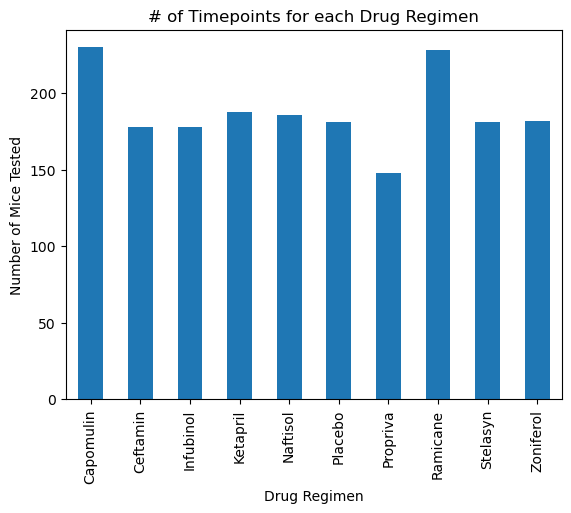

In [9]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
clean_df.groupby(["Drug Regimen"])["Timepoint"].count().plot(kind="bar")
plt.title("# of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")

<BarContainer object of 10 artists>

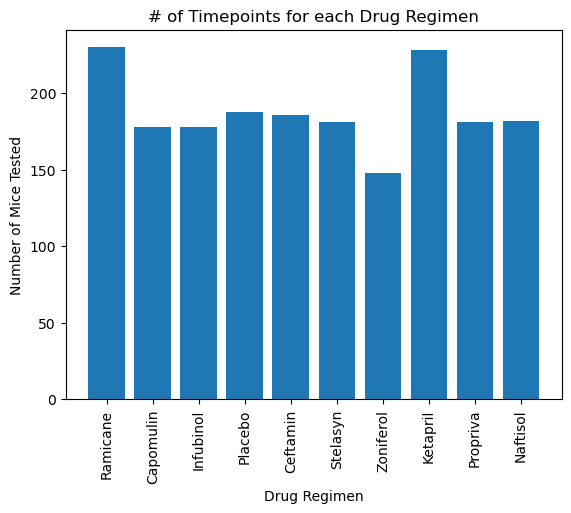

In [10]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.

x_axis=clean_df["Drug Regimen"].unique()
y_axis=clean_df.groupby(["Drug Regimen"])["Timepoint"].count()
plt.title("# of Timepoints for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice Tested")
plt.xticks(rotation=90)
plt.bar(x_axis, y_axis)


<AxesSubplot:ylabel='Sex'>

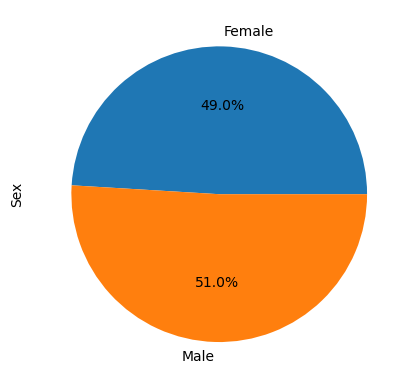

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
clean_df.groupby("Sex")["Mouse ID"].count().plot(kind="pie", ylabel="Sex", autopct="%1.1f%%")


<function matplotlib.pyplot.show(close=None, block=None)>

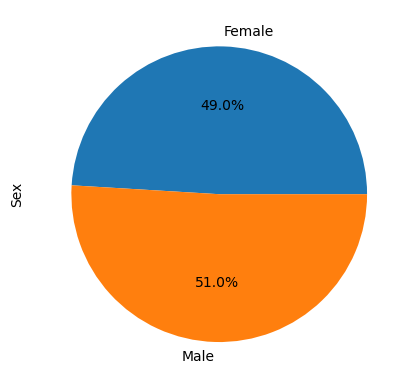

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Female", "Male"]
sizes=clean_df.groupby(["Sex"])["Mouse ID"].count()
plt.ylabel("Sex")
plt.pie(sizes, labels=labels, autopct="%1.1f%%")
plt.show

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
sorted=clean_df.groupby(["Mouse ID"]).last()
sorted
# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

final_df=pd.merge(sorted, clean_df, how= "inner").reset_index()
final_df

,index,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,Mouse ID
0,0,Infubinol,Female,20,23,45,67.973419,2,a203
1,1,Infubinol,Female,21,25,45,65.525743,1,a251
2,2,Placebo,Female,17,29,45,70.717621,4,a262
3,3,Ceftamin,Female,20,28,45,62.999356,3,a275
4,4,Stelasyn,Female,16,29,30,63.440686,1,a366
...,...,...,...,...,...,...,...,...,...
244,244,Propriva,Female,12,26,10,48.710661,0,z435
245,245,Ramicane,Male,11,16,45,30.638696,0,z578
246,246,Infubinol,Female,24,25,45,62.754451,3,z581
247,247,Naftisol,Female,13,29,45,65.741070,3,z795


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol","Ceftamin"]
# Create empty list to fill with tumor vol data (for plotting)
tumorvol=[]

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for treatment in treatments:
    # Locate the rows which contain mice on each drug and get the tumor volumes
        df=final_df.loc[final_df["Drug Regimen"] == treatment, "Tumor Volume (mm3)"]
    # add subset 
        tumorvol.append(df)
        quartiles = df.quantile([.25,.5,.75])
    # Determine outliers using upper and lower bounds
        lowerq = quartiles[0.25]
        upperq = quartiles[0.75]
        iqr = upperq-lowerq
        lower_bound = lowerq - (1.5*iqr)
        upper_bound = upperq + (1.5*iqr)
        outliers = df.loc[(df < lower_bound) | (df > upper_bound)]
        print(f"{treatment}'s potential outliers: {outliers}")

Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


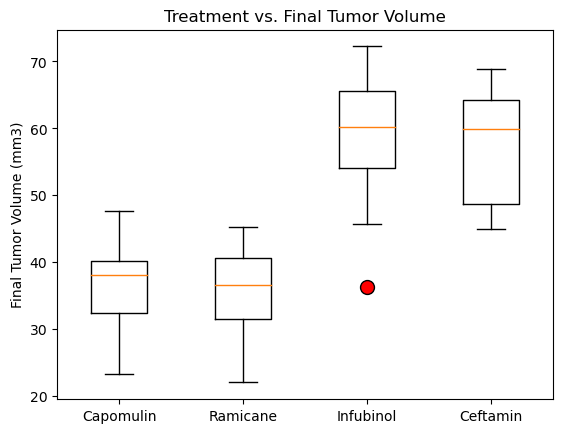

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
fig, ax = plt.subplots()
ax.set_title('Treatment vs. Final Tumor Volume')
ax.set_ylabel('Final Tumor Volume (mm3)')
custom= dict(markerfacecolor='r', markersize='10', marker='o')
ax.boxplot(tumorvol, flierprops= custom)
plt.xticks([1, 2, 3, 4], treatments)
plt.show()

## Line and Scatter Plots

<function matplotlib.pyplot.show(close=None, block=None)>

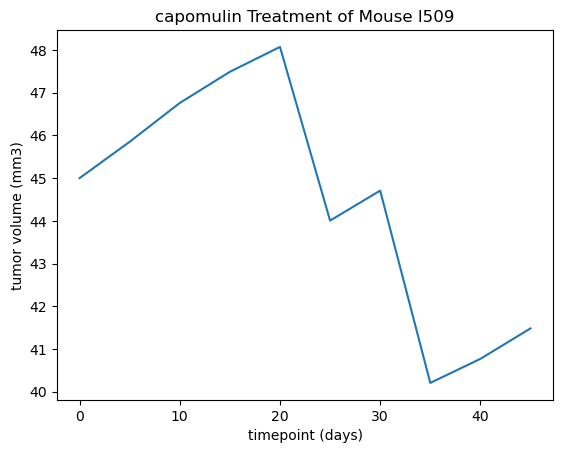

In [16]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin
cap=clean_df[clean_df["Drug Regimen"] == "Capomulin"]
mouse=cap[cap["Mouse ID"] == "l509"]
tumor_vol=mouse["Tumor Volume (mm3)"]
timepoint=mouse["Timepoint"]
plt.xlabel("timepoint (days)")
plt.ylabel("tumor volume (mm3)")
plt.title("capomulin Treatment of Mouse l509")
plt.plot(timepoint, tumor_vol)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

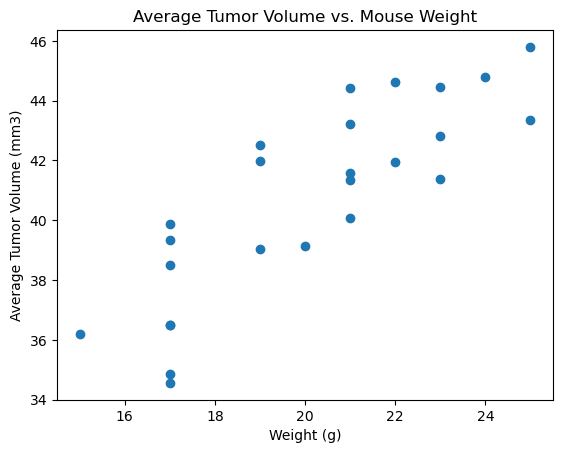

In [17]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen

average_tumor=cap.groupby("Mouse ID").mean()["Tumor Volume (mm3)"]
average_weight=cap.groupby("Mouse ID").mean()["Weight (g)"]
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.scatter(average_weight, average_tumor)
plt.show


## Correlation and Regression

The correlation between mouse weight and average tumor volume is 0.84


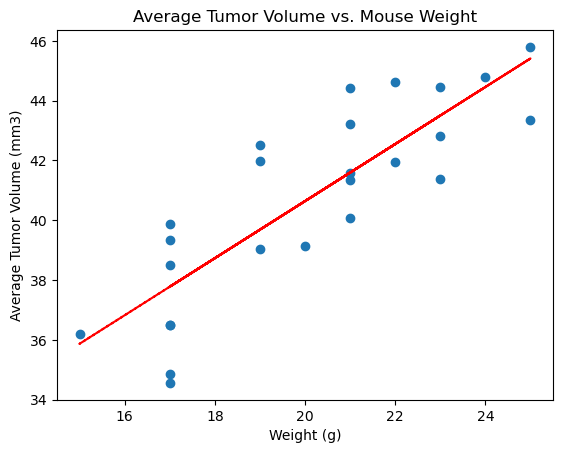

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
pe_slope, pe_int, pe_r, pe_p, pe_std_err = st.linregress(average_weight, average_tumor)

pe_fit = pe_slope * average_weight + pe_int

plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")
plt.title("Average Tumor Volume vs. Mouse Weight")
plt.scatter(average_weight, average_tumor)
plt.plot(average_weight,pe_fit,"--", color="red")

correlation = st.pearsonr(average_weight, average_tumor)
print(f"The correlation between mouse weight and average tumor volume is {round(correlation[0],2)}")